<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/1/MLP_Basics_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

import seaborn as sns
import io, requests, zipfile

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 10 )

plt.rc('figure', figsize=(10,5) )         # Image size

Data
===
In this part of the course, we review a few important step that should be taken before a ML project. 
It involves the following items:

*  Data clean-up

>  
*   The missing info
*   Non-numeric values 

* Scaling

* Data reduction

>  
* Feature Selection
* PCA
* Manifold Learning
* ...

* ...


Here we load some data and try to apply some of these techniques to it. 



In [3]:
import io, requests

#####BBR###### 
## This data is collected from galileo.phys.virginia.edu/classes/252
url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Data/bbr.xls?raw=true"
data_bbr = pd.read_excel(url)

########Particles#######
# Data taken from https://www.kaggle.com/naharrison/particle-identification-from-detector-responses

url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data_prtcl=pd.read_csv(io.BytesIO(s) , compression='zip' )
## Let's keep only a fraction of the data
# data_prtcl = data_prtcl.sample(100000)
# data_prtcl.head()

########GS energy#######
'''
We need to first import the data. I took the data from the following kaggle dataset. 

https://www.kaggle.com/burakhmmtgl/energy-molecule

These are the ground state energies of some molecules based on their different 
chemical bounds. 
'''
url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data_gse=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)


# Inspect the data

The first thing you should do is too see/inspect the data. 

              0             T           0.1           T/2           0.2
0   88182000000  2.978514e-23  2.997673e-23  1.478758e-23  1.498837e-23
1  176364000000  1.183007e-22  1.199069e-22  5.831636e-23  5.995346e-23
2  264546000000  2.642956e-22  2.697906e-22  1.293533e-22  1.348953e-22
3  352728000000  4.665309e-22  4.796277e-22  2.266891e-22  2.398138e-22
4  440910000000  7.237795e-22  7.494183e-22  3.491384e-22  3.747091e-22




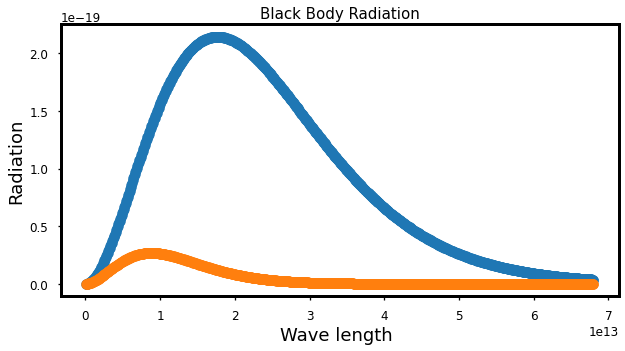

In [4]:
print(data_bbr.head())
print('\n')


n_s_rate=1

x_label = 'Wave length '
y_label = 'Radiation'
plt_title = 'Black Body Radiation'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(data_bbr[0][::n_s_rate], data_bbr['T'][::n_s_rate])
ax.scatter(data_bbr[0][::n_s_rate],  data_bbr['T/2'][::n_s_rate])
plt.show()

In [5]:
print(data_prtcl.head())

     id         p     theta      beta  nphe       ein      eout
0   211  0.780041  1.081480  0.989962     0  0.000000  0.000000
1   211  0.260929  0.778892  0.902450     0  0.000000  0.000000
2  2212  0.773022  0.185953  0.642428     4  0.101900  0.000000
3   211  0.476997  0.445561  0.951471     0  0.000000  0.000000
4  2212  2.123290  0.337332  0.908652     0  0.034379  0.049256


In [6]:
data_prtcl.apply(set, axis=0)

id                                   {321, 211, 2212, -11}
p        {0.565652, 1.26558, 1.80865, 1.906159999999999...
theta    {0.171875, 0.375, 0.515625, 1.0625, 0.53125, 0...
beta     {0.875, 1.0, 0.96875, 0.75, 0.734375, 0.8125, ...
nphe     {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
ein      {0.0, 0.109178, 0.10469200000000001, 0.171481,...
eout     {0.0, 0.45214, 0.338476, 0.171481, 0.380865, 0...
dtype: object

In [7]:
data_prtcl.describe()

,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


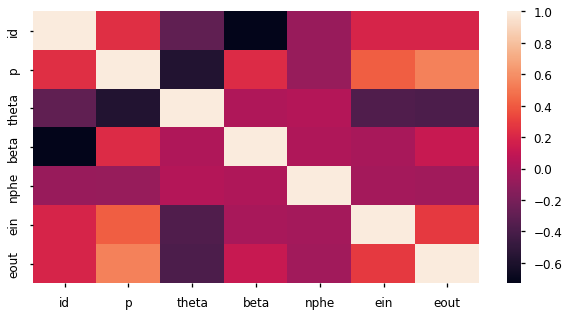

In [8]:
corr = data_prtcl.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

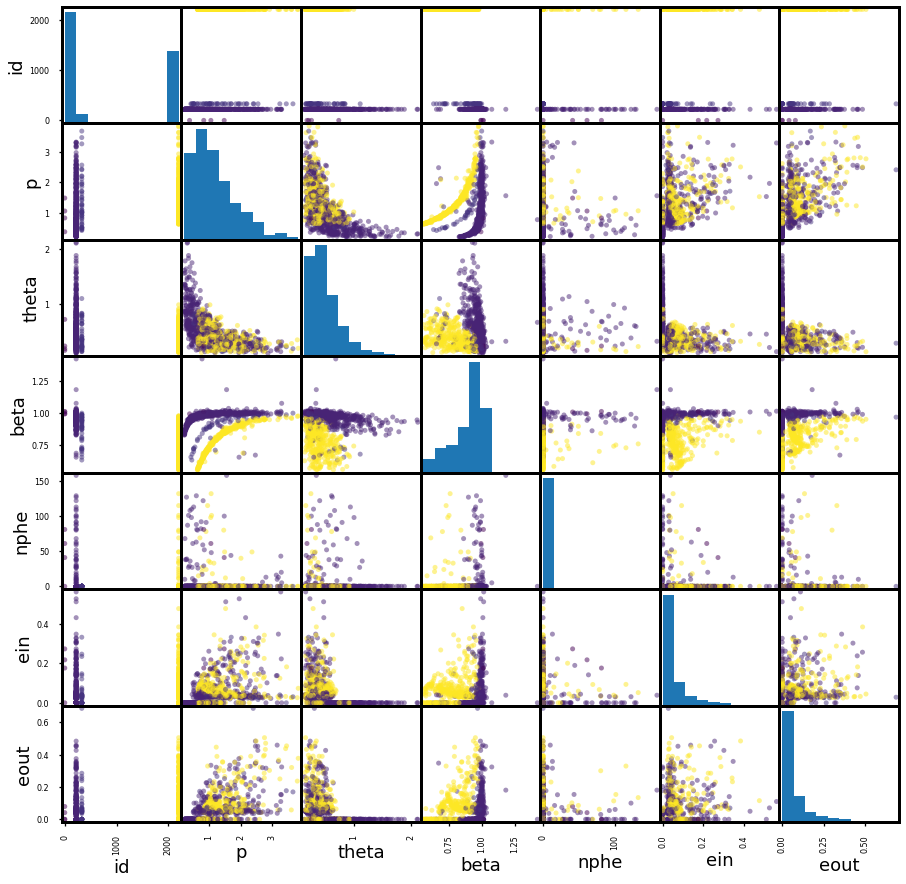

In [9]:
data_prtcl =  data_prtcl.sample(1000)
pd.plotting.scatter_matrix(data_prtcl, figsize=(15,15), c =data_prtcl.id )
plt.show()

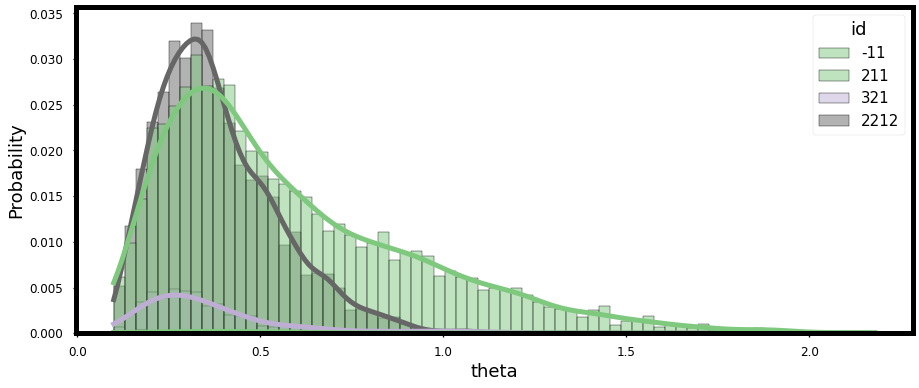

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(data_prtcl.sample(10000) , x='theta', kde=True, hue='id', stat='probability', palette=plt.cm.Accent, ax=ax)

In [12]:
data_gse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16242 entries, 0 to 16272
Columns: 1277 entries, 0 to Eat
dtypes: float64(1276), int64(1)
memory usage: 158.4 MB


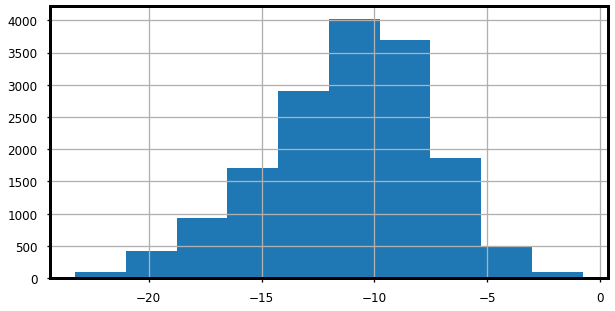

In [14]:
data_gse.Eat.hist()

Data Preparation
===
Here we mainly focus on scalars and standardization of our data

## Non-numerics

If the data is of categorical type, then it should be replaced with numbers. 
One easy way is to make a set of all the possible categories and then replace each value with the index of that specific value in the set list. 
We did this for the targets in the particle identification example, where we replaced the four ids of particles with numbers 0,1,2,3.

You can also simply use the OrdinalEncoder() from preprocessing class in sklearn. 

In [15]:
set(data_prtcl.id)

{-11, 211, 321, 2212}

In [16]:
# turn the id to a numerical feature
def cat_to_num(lablels_list, cat_data):
  return list(lablels_list).index(cat_data)

cat_to_num(['1','2','u','4','try'], 'try')

4

In [17]:
particle_labels = set(data_prtcl.id)
data_prtcl['id_num'] = data_prtcl.id.apply(lambda x:cat_to_num(particle_labels, x) )
data_prtcl.head()

,id,p,theta,beta,nphe,ein,eout,id_num
1751554,211,0.775464,0.636838,0.985826,0,0.000000,0.000000,1
3972509,2212,1.076980,0.226705,0.758152,0,0.020600,0.022843,2
552316,211,0.786450,0.546287,0.958550,0,0.057633,0.000000,1
1577847,211,0.925765,0.339845,0.978431,0,0.021241,0.050217,1
4093981,211,0.628824,0.642741,0.974714,0,0.000000,0.000000,1


### One-hot encoding

0 ==> (1,0,0,0)
1 ==> (0,1,0,0)
2 ==> (0,0,1,0)
3 ==> (0,0,0,1)

Write a function that implements this encoding.

In [21]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [22]:
data_prtcl.head()

,id,p,theta,beta,nphe,ein,eout,id_num
1360952,211,2.872660,0.109606,0.981072,0,0.037262,0.052415,1
2127857,2212,0.908370,0.422695,0.695139,0,0.055070,0.080613,2
715134,2212,0.796826,0.533290,0.644942,0,0.056306,0.000000,2
544858,211,0.230716,0.874106,0.859995,68,0.000000,0.000000,1
4022632,2212,1.108110,0.404636,0.757956,0,0.064866,0.111055,2


In [23]:
ord_enc = OrdinalEncoder()
ord_labels = ord_enc.fit_transform(data_prtcl[['id']]).reshape(-1)
print(ord_labels[:10])
# print(ord_labels==data_prtcl.id_num.values)


[1. 3. 3. 1. 3. 1. 1. 3. 3. 1.]


In [24]:
oh_enc = OneHotEncoder( )
oh_labels = oh_enc.fit_transform(data_prtcl[['id']] ).toarray()
print(oh_labels[:10])

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [ ]:
oh_enc.categories

{-11, 211, 321, 2212}

## Missing data 

You can drop nan values or replace (impute) them. 
pandas offeres tools like dropna for removing data instances with nan values. 

The better alternative is to replace the missing data: Here are a list of strategies that people use:

* mean
* median 
* most frequent
* out of range => Turn into outliers

Look into the SimpleImputer from imput class in sklearn. 

In [30]:
print(data_prtcl.loc[7].beta)
data_prtcl.at[7,'beta'] = np.nan
print(data_prtcl.loc[7].beta)

print(data_prtcl.loc[113].theta)
data_prtcl.at[113,'theta'] = np.nan


data_prtcl.head(8)

nan
nan
nan


,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
5,211,0.403296,0.694215,0.958553,0,0.000000,0.000000
6,2212,1.382620,0.436689,0.844835,0,0.200275,0.053651
7,2212,1.133130,0.276831,NaN,0,0.044038,0.093980


In [29]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(data_prtcl)[:5]

array([[2.11000e+02, 7.80041e-01, 1.08148e+00, 9.89962e-01, 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.11000e+02, 2.60929e-01, 7.78892e-01, 9.02450e-01, 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.21200e+03, 7.73022e-01, 1.85953e-01, 6.42428e-01, 4.00000e+00,
        1.01900e-01, 0.00000e+00],
       [2.11000e+02, 4.76997e-01, 4.45561e-01, 9.51471e-01, 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.21200e+03, 2.12329e+00, 3.37332e-01, 9.08652e-01, 0.00000e+00,
        3.43786e-02, 4.92561e-02]])

## Standardization and scaling the data

### Why do we need to scale the data?

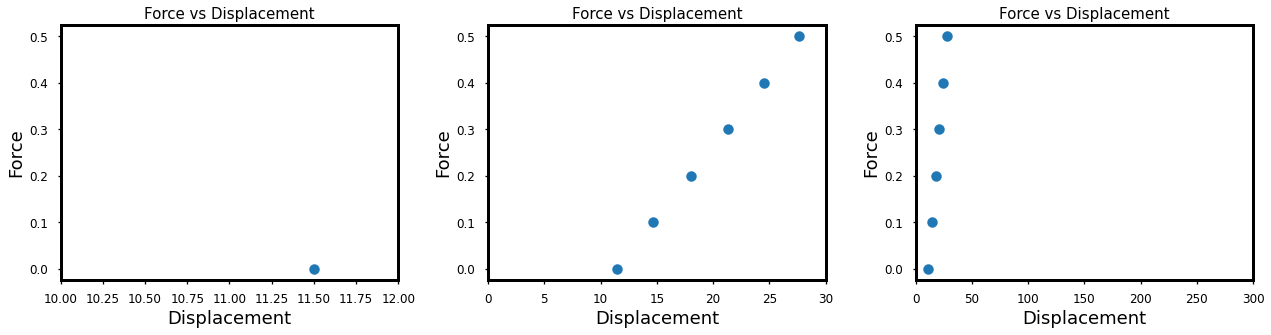

In [52]:
#@title What is the physically relevant scale? What is the scale we are using for our measurements?

# displacement_list = 
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Spring.csv'
s = requests.get(url).content
data_spring = pd.read_csv(io.StringIO(s.decode('utf-8')))

fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')
ax.scatter(data_spring.Displacement, data_spring.Force, label='Real data')
ax.set_xlim(10,12)
ax = fig.add_subplot(132, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')
ax.scatter(data_spring.Displacement, data_spring.Force, label='Real data')
ax.set_xlim(0,30)
ax = fig.add_subplot(133, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')
ax.scatter(data_spring.Displacement, data_spring.Force, label='Real data')
ax.set_xlim(0,300)

plt.tight_layout()
plt.show()


In [54]:
#@title What are the implications for optimization/training of a supervised model?


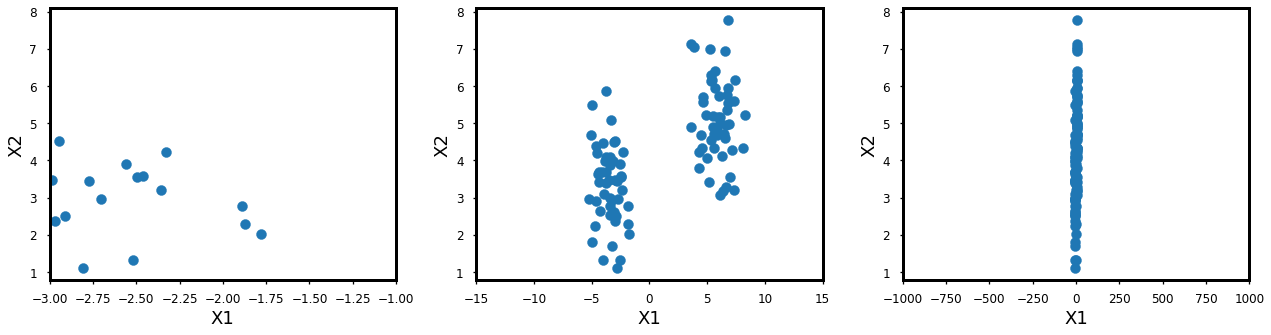

In [71]:
#@title Does it affect clusterng? 

from sklearn.datasets import make_blobs

data_cls = X_cls = make_blobs( 100, 2, centers=2 )[0]
# plt.scatter(*data_cls.T)



fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131, xlabel='X1', ylabel='X2')
ax.scatter(*data_cls.T)
ax.set_xlim(-3,-1)

ax = fig.add_subplot(132, xlabel='X1', ylabel='X2')
plt.scatter(*data_cls.T)
ax.set_xlim(-15,15)

ax = fig.add_subplot(133, xlabel='X1', ylabel='X2')
plt.scatter(*data_cls.T)
ax.set_xlim(-1000,1000)

plt.tight_layout()
plt.show()


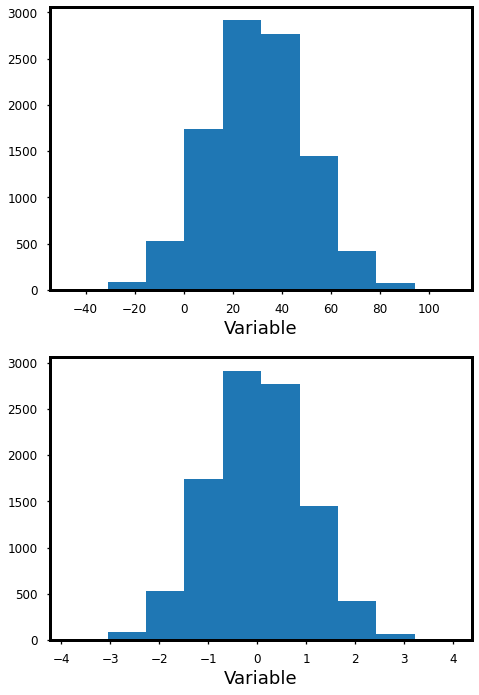

In [85]:
#@title Rescaling: Let's set the scale to be -5 to 5

center = 30
sigma = 20
rand_list = np.random.normal(center, sigma, 10000)


fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211, xlabel='Variable')
ax.hist(rand_list)
# ax.set_xlim(-5,5)

ax = fig.add_subplot(212, xlabel='Variable')
ax.hist((rand_list-center)/sigma)
# ax.set_xlim(-5,5)

# ax = fig.add_subplot(133, xlabel='Variable')
# ax.hist(rand_list)
# ax.set_xlim(-5,-5)


plt.tight_layout()
plt.show()


### How can we set the scale?



*   The physical scale of the quantities
*   The scale on which the quantities are changing



In [ ]:
Y = data_gse.Eat.values
X = data_gse.drop('Eat', axis=1).values
print(X.shape)
print(Y.shape)

(16242, 1276)
(16242,)


In [ ]:
X[1][X[1]>100]

array([25005.])

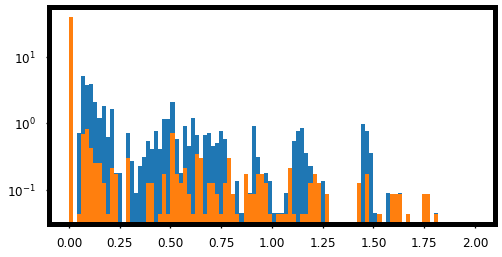

In [ ]:
plt.hist(X[0], bins=100, range=(0,2), density=True )
plt.hist(X[1], bins=100, range=(0,2), density=True)
plt.yscale('log')
plt.show()


In [ ]:
X.shape

(16242, 1276)

In [ ]:
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler, RobustScaler


'''
With scaler, it is fairly simple, just tranforms your data. 
You need to do this before splitting the data, since everytime 
you apply this, it scales the input (It does different things to different inputs).
'''
X_scaled = scale(X) 


'''
With standardScaler, it is like any other tranformation in sklearn. 
'''
s_scaler = StandardScaler()
X_sscaled = s_scaler.fit_transform(X) 


'''
We can also scale such that instead of unit variance, the whole data is fit 
between 0 and 1. For that we use minmax scalers. There's an alternative for 
absvalue of the data.
'''
mm_scaler = MinMaxScaler()
mm_scaler.fit(X)
X_mmscaled = mm_scaler.transform(X) 

'''
When we have outliers, scaling could be worsen the situation, 
For these situations, it is best to use a different scaler called Robust Scaler.
'''
r_scaler = RobustScaler()
r_scaler.fit(X)
X_rscaled = r_scaler.transform(X) 

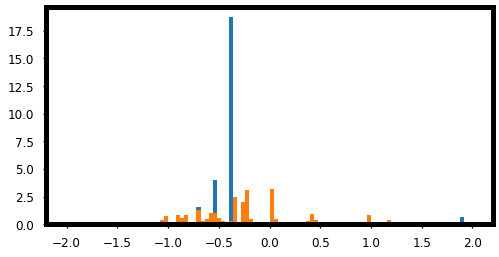

In [ ]:
plt.hist(X_sscaled[:, 0], bins=100, range=(-2,2), density=True )
plt.hist(X_sscaled[:, 2], bins=100, range=(-2,2), density=True)
# plt.yscale('log')
plt.show()


In [ ]:
print(X[10])
s_scaler.transform([X[10]])

[7.35166947e+01 1.85938263e+01 1.79021162e+01 ... 0.00000000e+00
 0.00000000e+00 2.50510000e+04]


array([[-0.37279531, -0.44482676, -0.33533156, ..., -0.04901331,
        -0.0490608 , -0.34347129]])

Often, the significance of scalers is more pronounced when data has features on very different scales. 
We'll come back to this. 

Data Reduction
===



In [ ]:
X = data_prtcl.drop(['id', 'id_num', 'nphe'], axis=1)
Y = data_prtcl.id_num
X[:5]

,p,theta,beta,ein,eout
0,0.780041,1.081480,0.989962,0.000000,0.000000
1,0.260929,0.778892,0.902450,0.000000,0.000000
2,0.773022,0.185953,0.642428,0.101900,0.000000
3,0.476997,0.445561,0.951471,0.000000,0.000000
4,2.123290,0.337332,0.908652,0.034379,0.049256


### Feature Selection 

This can be done both supervised and unsupervised. 

Let's start with with the unsupervised ones. 

#### Variance Threshold

In [ ]:
feature_variance = X.var(axis=0)
print(feature_variance)
to_keep_feat = feature_variance.sort_values()[-2:].index
print(f'\n We are keeping :{to_keep_feat}')
X[to_keep_feat].head()


p        0.549807
theta    0.086563
beta     0.012822
ein      0.006214
eout     0.010416
dtype: float64

 We are keeping :Index(['theta', 'p'], dtype='object')


,theta,p
0,1.081480,0.780041
1,0.778892,0.260929
2,0.185953,0.773022
3,0.445561,0.476997
4,0.337332,2.123290


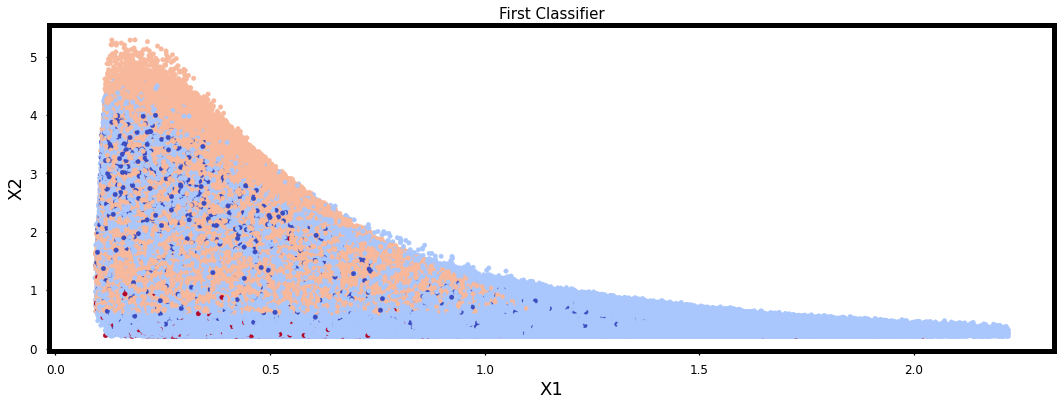

In [ ]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111, xlabel = 'X1', ylabel='X2', title='First Classifier')
ax1.scatter(*X[to_keep_feat].values.T, c= Y , cmap=plt.cm.coolwarm, s=20)
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
VT = VarianceThreshold(threshold=var_threshold)
var_thrshld_X = VT.fit_transform(data_prtcl)

print("The reduced X has a shape of {}".format(var_thrshld_X.shape))


The reduced X has a shape of (5000000, 3)


We can also done supervised. 

### Important Features
We can use different technqiues to identify the more important features. 
Here we use a couple of those techniques

#### Decision Tree and Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, random_state=0 )

In [ ]:
%%time
dt_reg = DecisionTreeRegressor()

params = {'max_depth': [1,3,5, 10, 20, 50]}
opt_dt_reg = GridSearchCV(dt_reg, param_grid=params, n_jobs=-1, verbose=1)
opt_dt_reg.fit(X,Y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   45.8s finished


CPU times: user 8.59 s, sys: 262 ms, total: 8.85 s
Wall time: 54.3 s


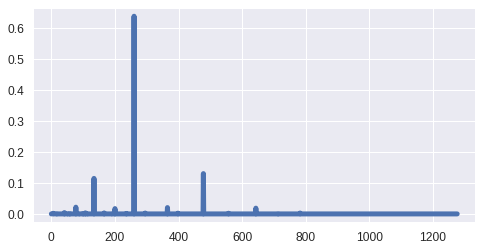

In [ ]:
dt_feature_importances = opt_dt_reg.best_estimator_.feature_importances_

plt.plot(  dt_feature_importances  )
plt.show()

In [ ]:
'''
Let's pick the first m more important features. 
'''
m=200

index_imfr = np.argsort( dt_feature_importances   )[:m]
important_feature_list = all_features[   index_imfr   ]

dt_reg.fit(X_train, Y_train)
print('Score without data reduction is: {}'.format(  dt_reg.score(X_test, Y_test)  ))

reduced_X_train = X_train[ important_feature_list ]
reduced_X_test = X_test[ important_feature_list ]

dt_reg.fit(reduced_X_train, Y_train)
print('Score without data reduction is: {}'.format(  dt_reg.score(reduced_X_test, Y_test)  ))


## Plot how the score changes with the number of feartures we keep. 



Score without data reduction is: 0.9965002506636973
Score without data reduction is: 0.9653715642291926


In [ ]:
dt_200_scores = cross_val_score(dt_reg,  X[ important_feature_list ] , Y , cv=10, n_jobs=-1)
print(dt_200_scores)

[0.96196497 0.96274876 0.96386685 0.96448277 0.96700257 0.9619719
 0.96736675 0.96397436 0.9680196  0.9631105 ]


#### Using sklearn

In [ ]:
model = SelectFromModel(dt_reg, threshold='median')
tr_X = model.fit_transform(X,Y)
print('Decision Tree feature selection: with {} features.'.format(tr_X.shape[1] ))

sm_scores = cross_val_score(dt_reg,  tr_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(sm_scores))

With 639 features.
The cv scores are:
 [0.99656587 0.99667043 0.99655016 0.99679885 0.99685368 0.99681324
 0.99704546 0.99695583 0.99683359 0.99687416]


In [ ]:
model = SelectFromModel(dt_reg, max_features=100, threshold=-np.inf)
tr_X = model.fit_transform(X,Y)
print('Decision Tree feature selection: with {} features.'.format(tr_X.shape[1] ))

sm_scores = cross_val_score(dt_reg,  tr_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(sm_scores))

Decision Tree feature selection: with 100 features.
The cv scores are:
 [0.99686261 0.99674216 0.99712008 0.99686053 0.99685988 0.99712153
 0.99749723 0.99728431 0.99696552 0.99715389]


In [ ]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(dt_reg, threshold='mean')
tr_X = model.fit_transform(X,Y)
print('Decision Tree feature selection: with {} features.'.format(tr_X.shape[1] ))

sm_scores = cross_val_score(dt_reg,  tr_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(sm_scores))

With 18 features.
The cv scores are:
 [0.99325773 0.99359497 0.9931116  0.99351741 0.99459773 0.99426679
 0.99430907 0.99310287 0.99438323 0.99378704]


In [ ]:
### With Ridge

model = SelectFromModel(Ridge() )
tr_X = model.fit_transform(X,Y)
print('Ridge feature selection: with {} features.'.format(tr_X.shape[1] ))

sm_scores = cross_val_score(Ridge(),  tr_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(sm_scores))

Ridge feature selection: with 388 features.
The cv scores are:
 [0.98834363 0.98847938 0.9886359  0.98927644 0.99073162 0.99030298
 0.98948163 0.98926519 0.98957052 0.98950002]


#### Recursive Feature selection

In [ ]:
%%time
from sklearn.feature_selection import RFE, RFECV

rfe = RFE(estimator=Ridge() , step=10  )
rfe.fit(X, Y)
rfs_X = rfe.transform(X)
print('Ridge feature selection: with {} features.'.format(rfs_X.shape[1] ))

rfs_scores = cross_val_score(Ridge(),  rfs_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(rfs_scores))

Ridge feature selection: with 638 features.
The cv scores are:
 [0.92913818 0.93175822 0.92430026 0.92936232 0.01762791 0.93416802
 0.93647594 0.91884961 0.92903547 0.92340594]
CPU times: user 1min 27s, sys: 13.2 s, total: 1min 40s
Wall time: 1min 1s


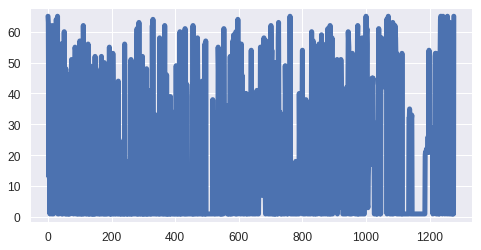

In [ ]:
plt.plot(rfe.ranking_)

## Feature transformation

We can also transform the original features into fewer number of new features that capture the information/quality of the original data. 

The transformation can be linear or non-linear. 

### PCA

Text(0, 0.5, 'X2')

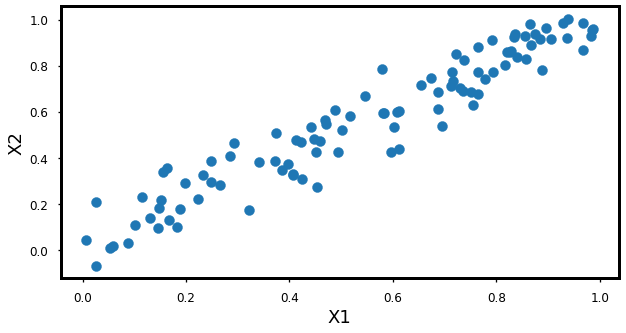

In [4]:
mid_list = np.random.uniform(0,1, 100)
noise_list = np.random.normal(0,.1,100)
synth_data =np.vstack([mid_list, mid_list + noise_list ])
plt.scatter(*synth_data)
plt.xlabel('X1')
plt.ylabel('X2')
# synth_data

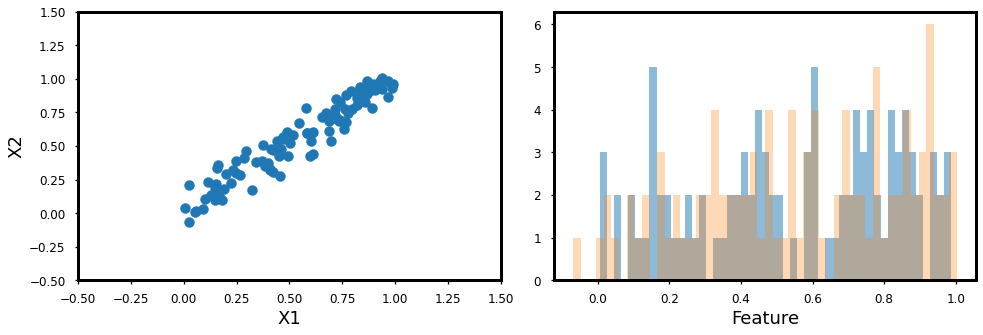

In [5]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121, xlabel='X1', ylabel='X2')
ax.scatter(*synth_data)
ax.set_xlim(-.5,1.5)
ax.set_ylim(-.5,1.5)

ax = fig.add_subplot(122, xlabel='Feature')
plt.hist(synth_data[0], 50, label='X1', alpha = .5)
plt.hist(synth_data[1], 50, label='X2', alpha = .3)
# ax.set_xlim(-1.5,1.5)


plt.tight_layout()
plt.show()


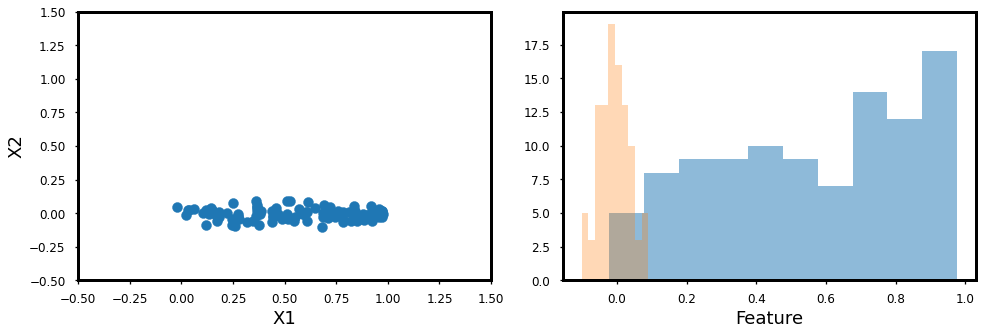

In [6]:
transformed_data = np.array([ [(p[0]+p[1])/2 , (p[0]-p[1])/2 ] for p in synth_data.T]).T

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121, xlabel='X1', ylabel='X2')
ax.scatter(*transformed_data)
ax.set_xlim(-.5,1.5)
ax.set_ylim(-.5,1.5)

ax = fig.add_subplot(122, xlabel='Feature')
plt.hist(transformed_data[0], label='X1', alpha = .5)
plt.hist(transformed_data[1], label='X2', alpha = .3)
# ax.set_xlim(-1.5,1.5)


plt.tight_layout()
plt.show()


(-1.0, 1.0)

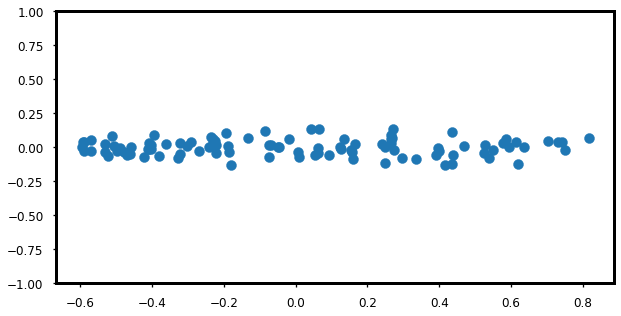

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X = pca.fit_transform(synth_data.T)
plt.scatter(*pca_X.T)
plt.ylim(-1, 1)


In [ ]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

#### GSE data

In [8]:
from sklearn.decomposition import PCA

pca = PCA( )
pca_X = pca.fit_transform(data_gse.drop(['Eat', 'pubchem_id'], axis=1) )

print("The reduced X has a shape of {}".format(pca_X.shape))

# pca_scores = cross_val_score(Ridge(),  pca_X , Y , cv=10, n_jobs=-1)

# print('The cv scores are:\n {}'.format(pca_scores))

The reduced X has a shape of (16242, 1275)


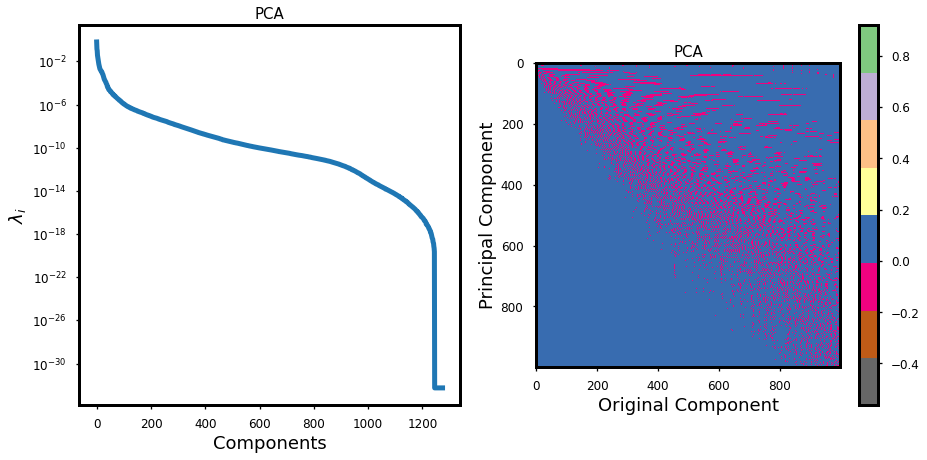

In [9]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(121, xlabel='Components', ylabel= r'$\lambda_i$', title='PCA')
plt.plot(pca.explained_variance_ratio_)
plt.yscale('log')

ax = fig.add_subplot(122, xlabel='Original Component', ylabel='Principal Component', title='PCA')
plt.imshow(pca.components_[:1000, :1000], cmap=plt.cm.Accent_r )
plt.colorbar()
plt.show()

In [ ]:
'''
Try this for training a model and use different number of features e.g. 100,, 50, 10,...
'''
pca = PCA(n_components=100)
pca_X = pca.fit_transform(X)


#### Particle Identification

In [11]:
data_prtcl

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
4999995,211,0.835889,0.495847,0.975812,0,0.000000,0.046967
4999996,211,2.027470,0.287966,1.222890,0,0.197894,0.186404
4999997,211,0.827497,0.689746,0.980957,0,0.000000,0.000000
4999998,2212,1.331200,0.382746,0.811818,0,0.036942,0.056947


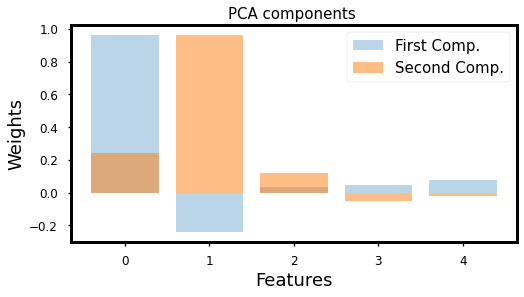

In [13]:
from sklearn.decomposition import PCA

X = data_prtcl.drop(['id', 'nphe'], axis=1)
Y = data_prtcl.id

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, xlabel = 'Features', ylabel='Weights', title='PCA components ')
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)
# plt.scatter(range(5), pca.components_[0])
# plt.scatter(range(5), pca.components_[1])
plt.bar(range(5),pca.components_[0], alpha=.3,  label='First Comp.')
plt.bar(range(5),pca.components_[1], alpha=.5,  label='Second Comp.')
plt.legend(loc=0)
plt.show()

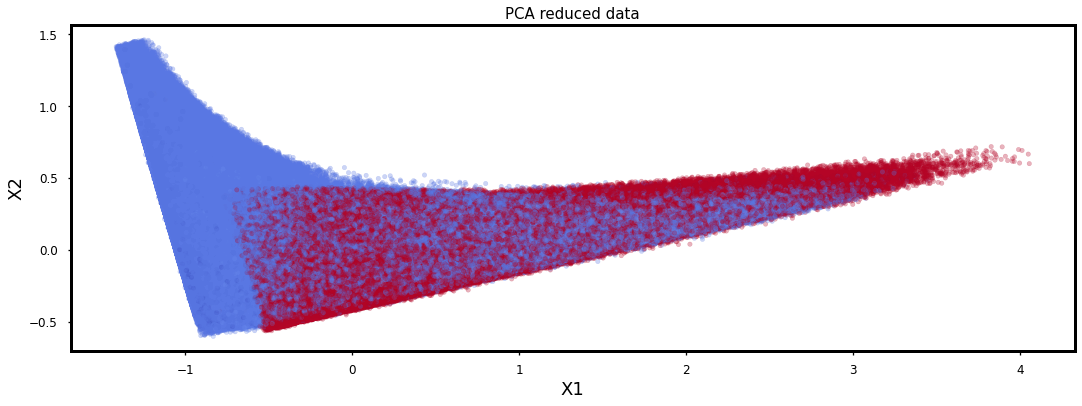

In [14]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111, xlabel = 'X1', ylabel='X2', title='PCA reduced data')
ax1.scatter(*pca_X.T, c= Y , cmap=plt.cm.coolwarm, s=20, alpha=.3)
plt.show()

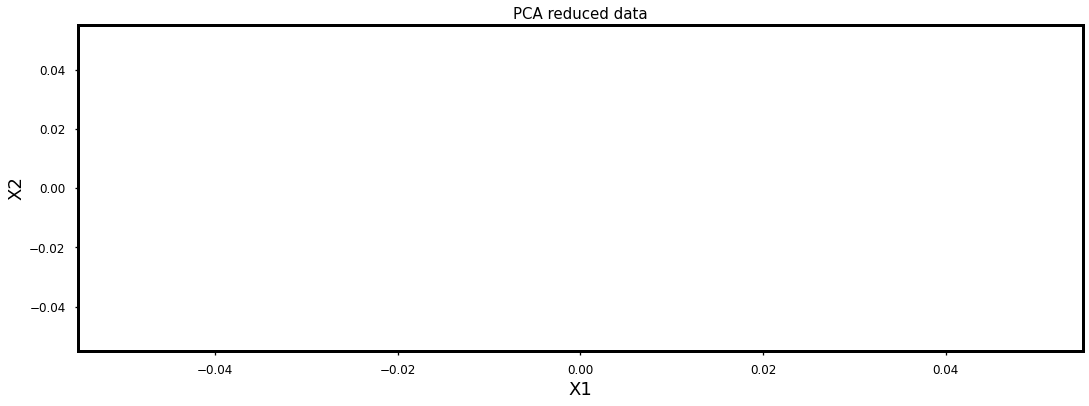

In [15]:
labels_to_keep = [1,2]
ind_to_keep = np.any(np.vstack( [Y==i for i in labels_to_keep] ), axis=0)
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111, xlabel = 'X1', ylabel='X2', title='PCA reduced data')
ax1.scatter(*pca_X[ind_to_keep].T, c= Y[ind_to_keep] , cmap=plt.cm.coolwarm, s=10, alpha=.3)
plt.show()

## Maniforld Learning

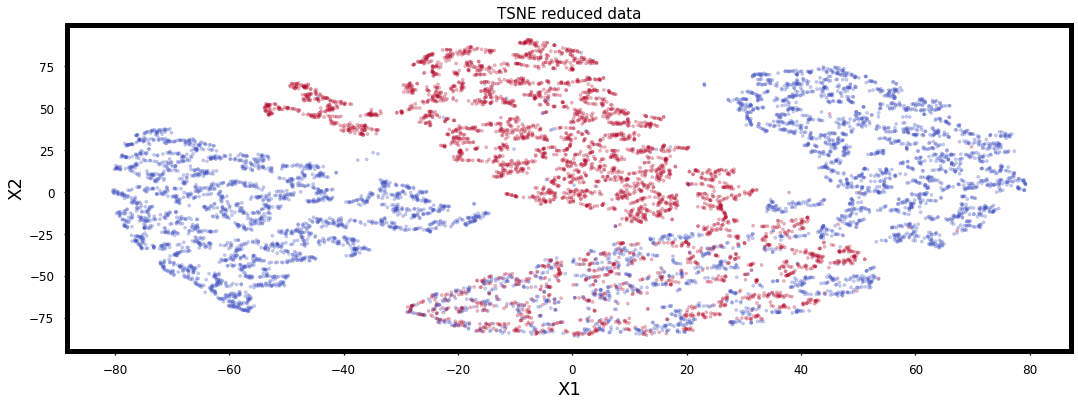

CPU times: user 2min 50s, sys: 582 ms, total: 2min 51s
Wall time: 1min 27s


In [ ]:
%%time
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, SpectralEmbedding

data_prtcl = data_prtcl.sample(10000)
X = data_prtcl.drop(['id', 'id_num', 'nphe'], axis=1)
Y = data_prtcl.id_num

m = TSNE(n_components=2)
m_X = m.fit_transform(X)

labels_to_keep = [1,2]
ind_to_keep = np.any(np.vstack( [Y==i for i in labels_to_keep] ), axis=0)

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111, xlabel = 'X1', ylabel='X2', title='TSNE reduced data')
ax1.scatter(*m_X[ind_to_keep].T, c= Y[ind_to_keep] , cmap=plt.cm.coolwarm, s=10, alpha=.3)
plt.show()

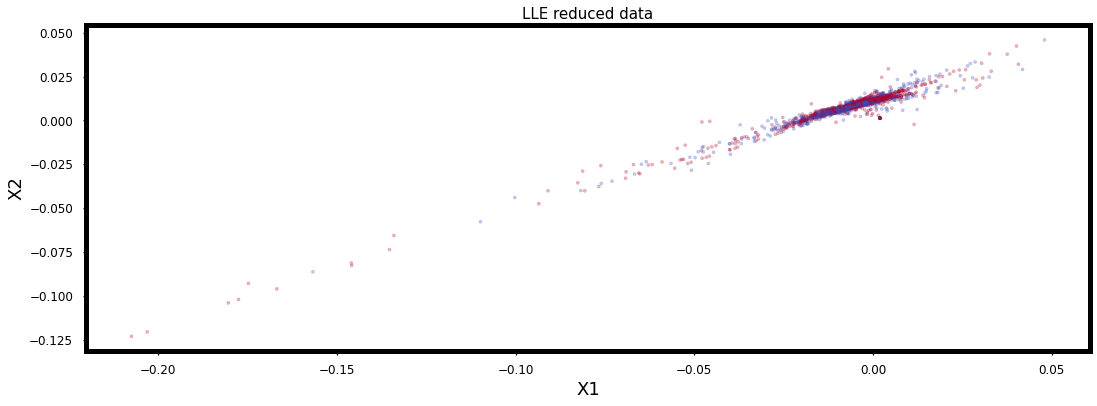

CPU times: user 3.16 s, sys: 887 ms, total: 4.05 s
Wall time: 2.51 s


In [ ]:
%%time
# data_prtcl = data_prtcl.sample(10000)
# X = data_prtcl.drop(['id', 'id_num', 'nphe'], axis=1)
# Y = data_prtcl.id_num

m = LocallyLinearEmbedding(n_components=2)
m_X = m.fit_transform(X)

labels_to_keep = [1,2]
ind_to_keep = np.any(np.vstack( [Y==i for i in labels_to_keep] ), axis=0)

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111, xlabel = 'X1', ylabel='X2', title='LLE reduced data')
ax1.scatter(*m_X[ind_to_keep].T, c= Y[ind_to_keep] , cmap=plt.cm.coolwarm, s=10, alpha=.3)
plt.show()

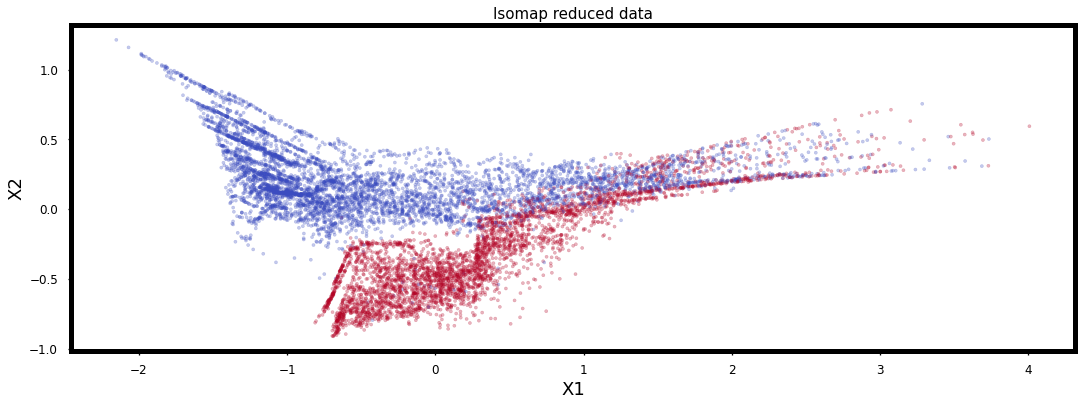

CPU times: user 1min 3s, sys: 2.81 s, total: 1min 5s
Wall time: 1min 4s


In [ ]:
%%time
# data_prtcl = data_prtcl.sample(10000)
# X = data_prtcl.drop(['id', 'id_num', 'nphe'], axis=1)
# Y = data_prtcl.id_num

m = Isomap(n_components=2)
m_X = m.fit_transform(X)

labels_to_keep = [1,2]
ind_to_keep = np.any(np.vstack( [Y==i for i in labels_to_keep] ), axis=0)

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111, xlabel = 'X1', ylabel='X2', title='Isomap reduced data')
ax1.scatter(*m_X[ind_to_keep].T, c= Y[ind_to_keep] , cmap=plt.cm.coolwarm, s=10, alpha=.3)
plt.show()

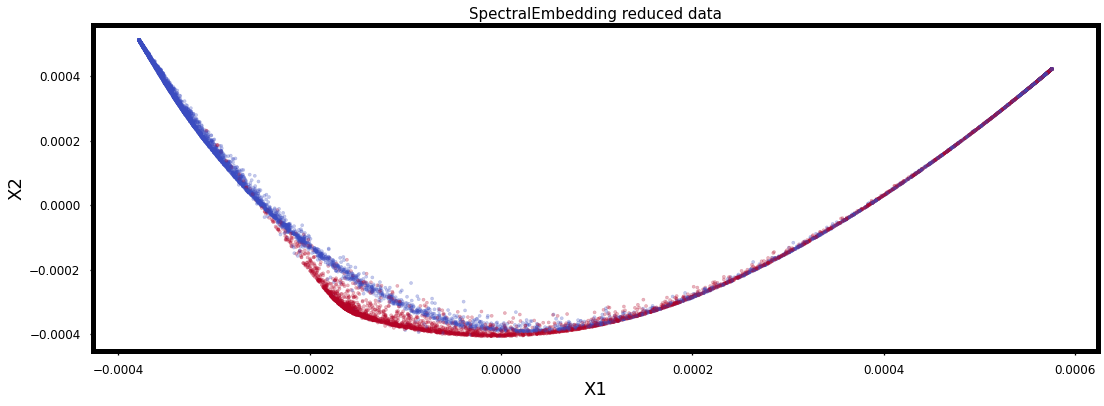

CPU times: user 2min, sys: 1min 3s, total: 3min 3s
Wall time: 1min 45s


In [ ]:
%%time
# data_prtcl = data_prtcl.sample(10000)
# X = data_prtcl.drop(['id', 'id_num', 'nphe'], axis=1)
# Y = data_prtcl.id_num

m = SpectralEmbedding(n_components=2)
m_X = m.fit_transform(X)

labels_to_keep = [1,2]
ind_to_keep = np.any(np.vstack( [Y==i for i in labels_to_keep] ), axis=0)

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111, xlabel = 'X1', ylabel='X2', title='SpectralEmbedding reduced data')
ax1.scatter(*m_X[ind_to_keep].T, c= Y[ind_to_keep] , cmap=plt.cm.coolwarm, s=10, alpha=.3)
plt.show()

# Exercise



In [18]:
url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Data/random_tweets.csv?raw=true"
data_tweeter = pd.read_csv(url)
data_tweeter.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1444452133055737858,1444446750329098241,2021-10-02 23:59:59 UTC,2021-10-02,23:59:59,0,1127431975520882688,maudi63,Maudi63,NaN,@Timodc I just looked up where he grew up. Low...,en,[],[],[],28,13,214,[],[],https://twitter.com/maudi63/status/14444521330...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Timodc', 'name': 'Tim Miller...",NaN,NaN,NaN,NaN
1,1444452128626413570,1444452128626413570,2021-10-02 23:59:58 UTC,2021-10-02,23:59:58,0,793331593,tee_asz,Tee Zee🕯️✳️✳️,NaN,Good morning to the ICAC commissioners in NSW ...,en,[],[],[],7,107,584,[],[],https://twitter.com/tee_asz/status/14444521286...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1444452128341299206,1444452128341299206,2021-10-02 23:59:58 UTC,2021-10-02,23:59:58,0,386317180,swtlovex,👙👑💸 Hër Röyal Emprë$$,NaN,U see some of us that can’t dance just like Wh...,en,[],[],[],8,10,41,[],[],https://twitter.com/swtlovex/status/1444452128...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1444452120858562563,1444452120858562563,2021-10-02 23:59:56 UTC,2021-10-02,23:59:56,0,1228693982013607937,votefortaeyong,Vote Taeyong🌹,NaN,Nehan voting daily 1. Click the link 2. Click ...,ja,[],['https://www.nehannn.com/artist-detail/600.ht...,[],0,31,45,"['テヨン', 'taeyong', '태용']",[],https://twitter.com/voteforTaeyong/status/1444...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1444452119902183425,1444452119902183425,2021-10-02 23:59:56 UTC,2021-10-02,23:59:56,0,1264612627516293121,kiergzn_,Kier,NaN,Thank you for all the killings and making the ...,en,[],[],[],5,17,125,['salamatprrd'],[],https://twitter.com/kiergzn_/status/1444452119...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


(0.0, 200.0)

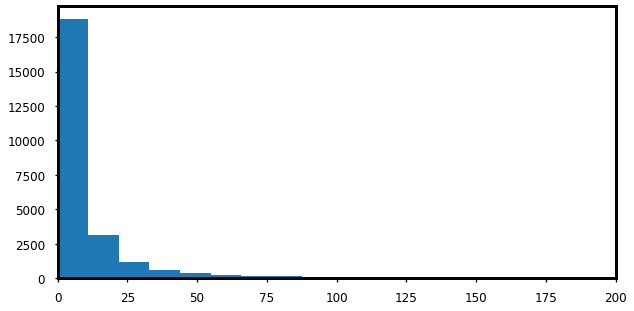

In [36]:
X = data_tweeter.retweets_count
plt.hist(X, 2000);
plt.xlim(0, 200)
# plt.xscale('log')